In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("house_price.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
sns.pairplot(df)

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

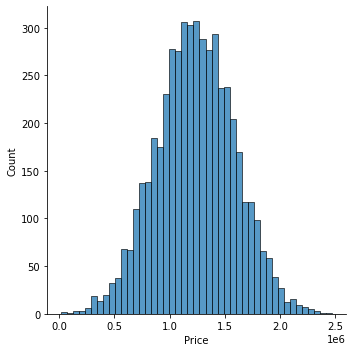

In [10]:
sns.displot(df['Price']);

<AxesSubplot:>

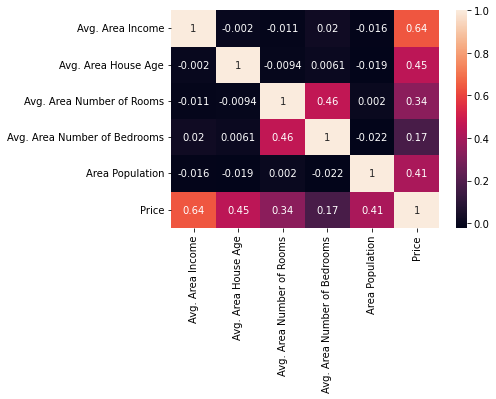

In [12]:
sns.heatmap(df.corr(), annot=True)

In [29]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
X = df.drop(['Address', 'Price'], axis=1)

In [12]:
y = df['Price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
print(lm.intercept_)
# the point where the function crosses the y-axis

-2640159.796851625


In [66]:
lm.coef_
# coefficients are the values that multiply the predictor values.
# Suppose you have the following regression equation: y = 3X + 5. In this equation, +3 is the coefficient, X is the predictor, 
# and +5 is the constant.

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [67]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [68]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [69]:
from sklearn.datasets import load_boston #baraye import kardan dataseti az sklearn intor kar mishavad.

In [70]:
boston = load_boston()

In [71]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [72]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [75]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

df = pd.read_csv("file_name")
df.info() #data frame information
df.head() #baraye bargardandane 5 row avalie data frame
df.columns
X = df.drop(['Price', 'Address'], axis=1) 
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(X, y, train_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression
lm.train(X_train, y_train)




import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df = pd.read_csv('boston.csv')
df.info()
df.describe()
sns.pariplot(df)
df.distplot('price')
x = df.drop(['address', 'price'], axis=1)
y = df['price']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X_trarin, y_train)
predictions = lm.predict(X_test)
sns.lmplot(predictions, y_test)

FileNotFoundError: [Errno 2] No such file or directory: 'file_name'

In [18]:
predictions = lm.predict(X_test)

In [19]:
predictions

array([1260960.70567626,  827588.75560359, 1742421.24254323, ...,
        372191.40626965, 1365217.15140894, 1914519.54178805])

In [20]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

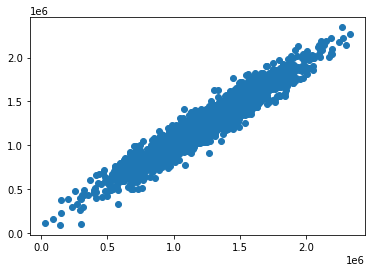

In [21]:
plt.scatter(y_test, predictions)

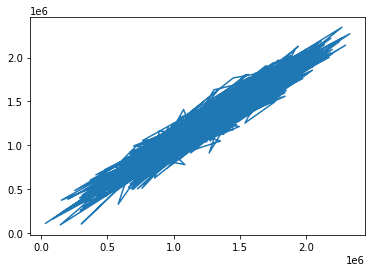

In [22]:
plt.plot(y_test, predictions)

<AxesSubplot:xlabel='Price', ylabel='Count'>

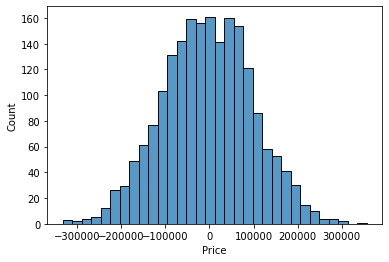

In [66]:
sns.histplot((y_test - predictions))

C:\Users\Nima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

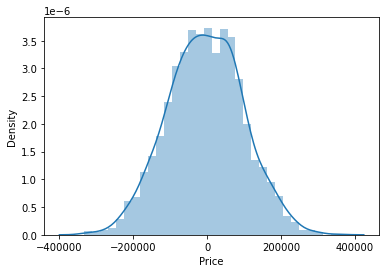

In [76]:
sns.distplot((y_test - predictions))

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_absolute_error(y_test, predictions)  

82288.22251914961

In [71]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209694

In [73]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))   #root mean squared error

102278.82922291246

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("house_price.csv")

df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
X = df.drop(['Price', 'Address'] , axis=1)
y = df['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [8]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = lm.predict(X_test)

In [19]:
predictions

array([1260960.70567626,  827588.75560359, 1742421.24254323, ...,
        372191.40626965, 1365217.15140894, 1914519.54178805])

In [20]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

In [21]:
from sklearn import metrics

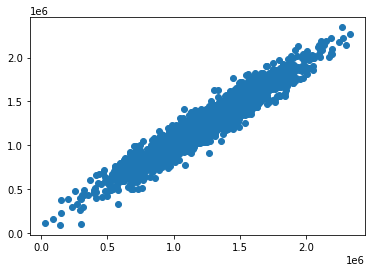

In [25]:
plt.scatter(y_test, predictions); #namayeshe nemoodare zir neshan midahad predicte ma khoob boode ast.